In [1]:
import awkward as ak
import numpy as np
import pickle
import hist
import coffea
from plugins import *
%matplotlib inline

# from hist import intervals
import matplotlib.pyplot as plt
import mplhep as hep
import matplotlib as mpl

#### test voms connections
# redirector = 'root://xcache/'
redirector='root://cmsxrootd.fnal.gov/'
# files = handleData('fileset_QCD.json', redirector, year = 2018, testing = True)
files = handleData('datasets_UL_NANOAOD.json', redirector, year = 2018, testing = True)
#events = NanoEventsFactory.from_root(redirector+'/store/mc/RunIISummer20UL18NanoAODv9/QCD_Pt_3200toInf_TuneCP5_13TeV_pythia8/NANOAODSIM/106X_upgrade2018_realistic_v16_L1v1-v1/120000/6BEB9A7B-150C-7440-96D8-17A3D87F3225.root', schemaclass=NanoAODSchema).events()

# import uproot
# # ### uproot notation
# qcd_mc = uproot.open(list(files.values())[-1][0])
# # qcd_mc = uproot.open(redirector+'/store/mc/RunIISummer20UL18NanoAODv9/QCD_Pt_3200toInf_TuneCP5_13TeV_pythia8/NANOAODSIM/106X_upgrade2018_realistic_v16_L1v1-v1/120000/6BEB9A7B-150C-7440-96D8-17A3D87F3225.root')
# uprootevents = qcd_mc['Events']
# print(uprootevents.keys('*df*'))
# print(uprootevents['Generator_xpdf1'].array())
# #### print Q2 scale
# print(uprootevents['Generator_scalePDF'].array())


In [ ]:
fname = "coffeaOutput/trijetHists_wXSscaling_QCDsim_pt200.0_eta2.4_bbloose.pkl"
with open(fname, "rb") as f:
    result = pickle.load( f )
fname = "coffeaOutput/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_bbloosejesjecALL.pkl"
with open(fname, "rb") as f:
    result_jec = pickle.load( f )
os_path = 'plots/selectionStudies/dijet/'
checkdir(os_path)

In [2]:
fname = "coffeaOutput/trijetHists_wXSscaling_QCDsim_pt200.0_eta2.4_bbloose.pkl"
with open(fname, "rb") as f:
    result = pickle.load( f )
fname = "coffeaOutput/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_bbloosejesjecALL.pkl"
with open(fname, "rb") as f:
    result_jec = pickle.load( f )
os_path = 'plots/selectionStudies/dijet/'
checkdir(os_path)

dict_keys(['jet_mass', 'jet_pt', 'jet_eta', 'btag', 'cutflow', 'njet_gen', 'dphimin_gen', 'asymm_gen', 'njet_reco', 'dphimin_reco', 'asymm_reco', 'jet_dr_reco_gen', 'jet_mass_reco_over_gen', 'jet_pt_reco', 'jet_pt_gen', 'jet_pt_reco_over_gen', 'jet_eta_reco', 'jet_eta_gen', 'jet_rap_reco', 'jet_rap_gen', 'jet_dphi_reco', 'jet_ptasymm_reco', 'jet_dr_gen_subjet', 'jet_dr_reco_to_gen_subjet', 'jet_sd_mass_reco', 'jet_sd_mass_gen', 'misses_g', 'fakes_g', 'misses', 'fakes', 'jet_pt_mass_reco_u', 'jet_pt_mass_reco_g', 'jet_pt_mass_gen_u', 'jet_pt_mass_gen_g', 'jet_m_pt_u_reco_over_gen', 'jet_m_pt_g_reco_over_gen', 'response_matrix_u', 'response_matrix_g', 'weights', 'systematics'])
['dataset', 'syst', 'ptreco', 'mreco']
[(200.0, 280.0), (280.0, 360.0), (360.0, 450.0), (450.0, 520.0), (520.0, 630.0), (630.0, 690.0), (690.0, 750.0), (750.0, 800.0), (800.0, 1300.0), (1300.0, 13000.0)]
3
['nominal', 'jesUp', 'jesDown', 'jerUp', 'jerDown']


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


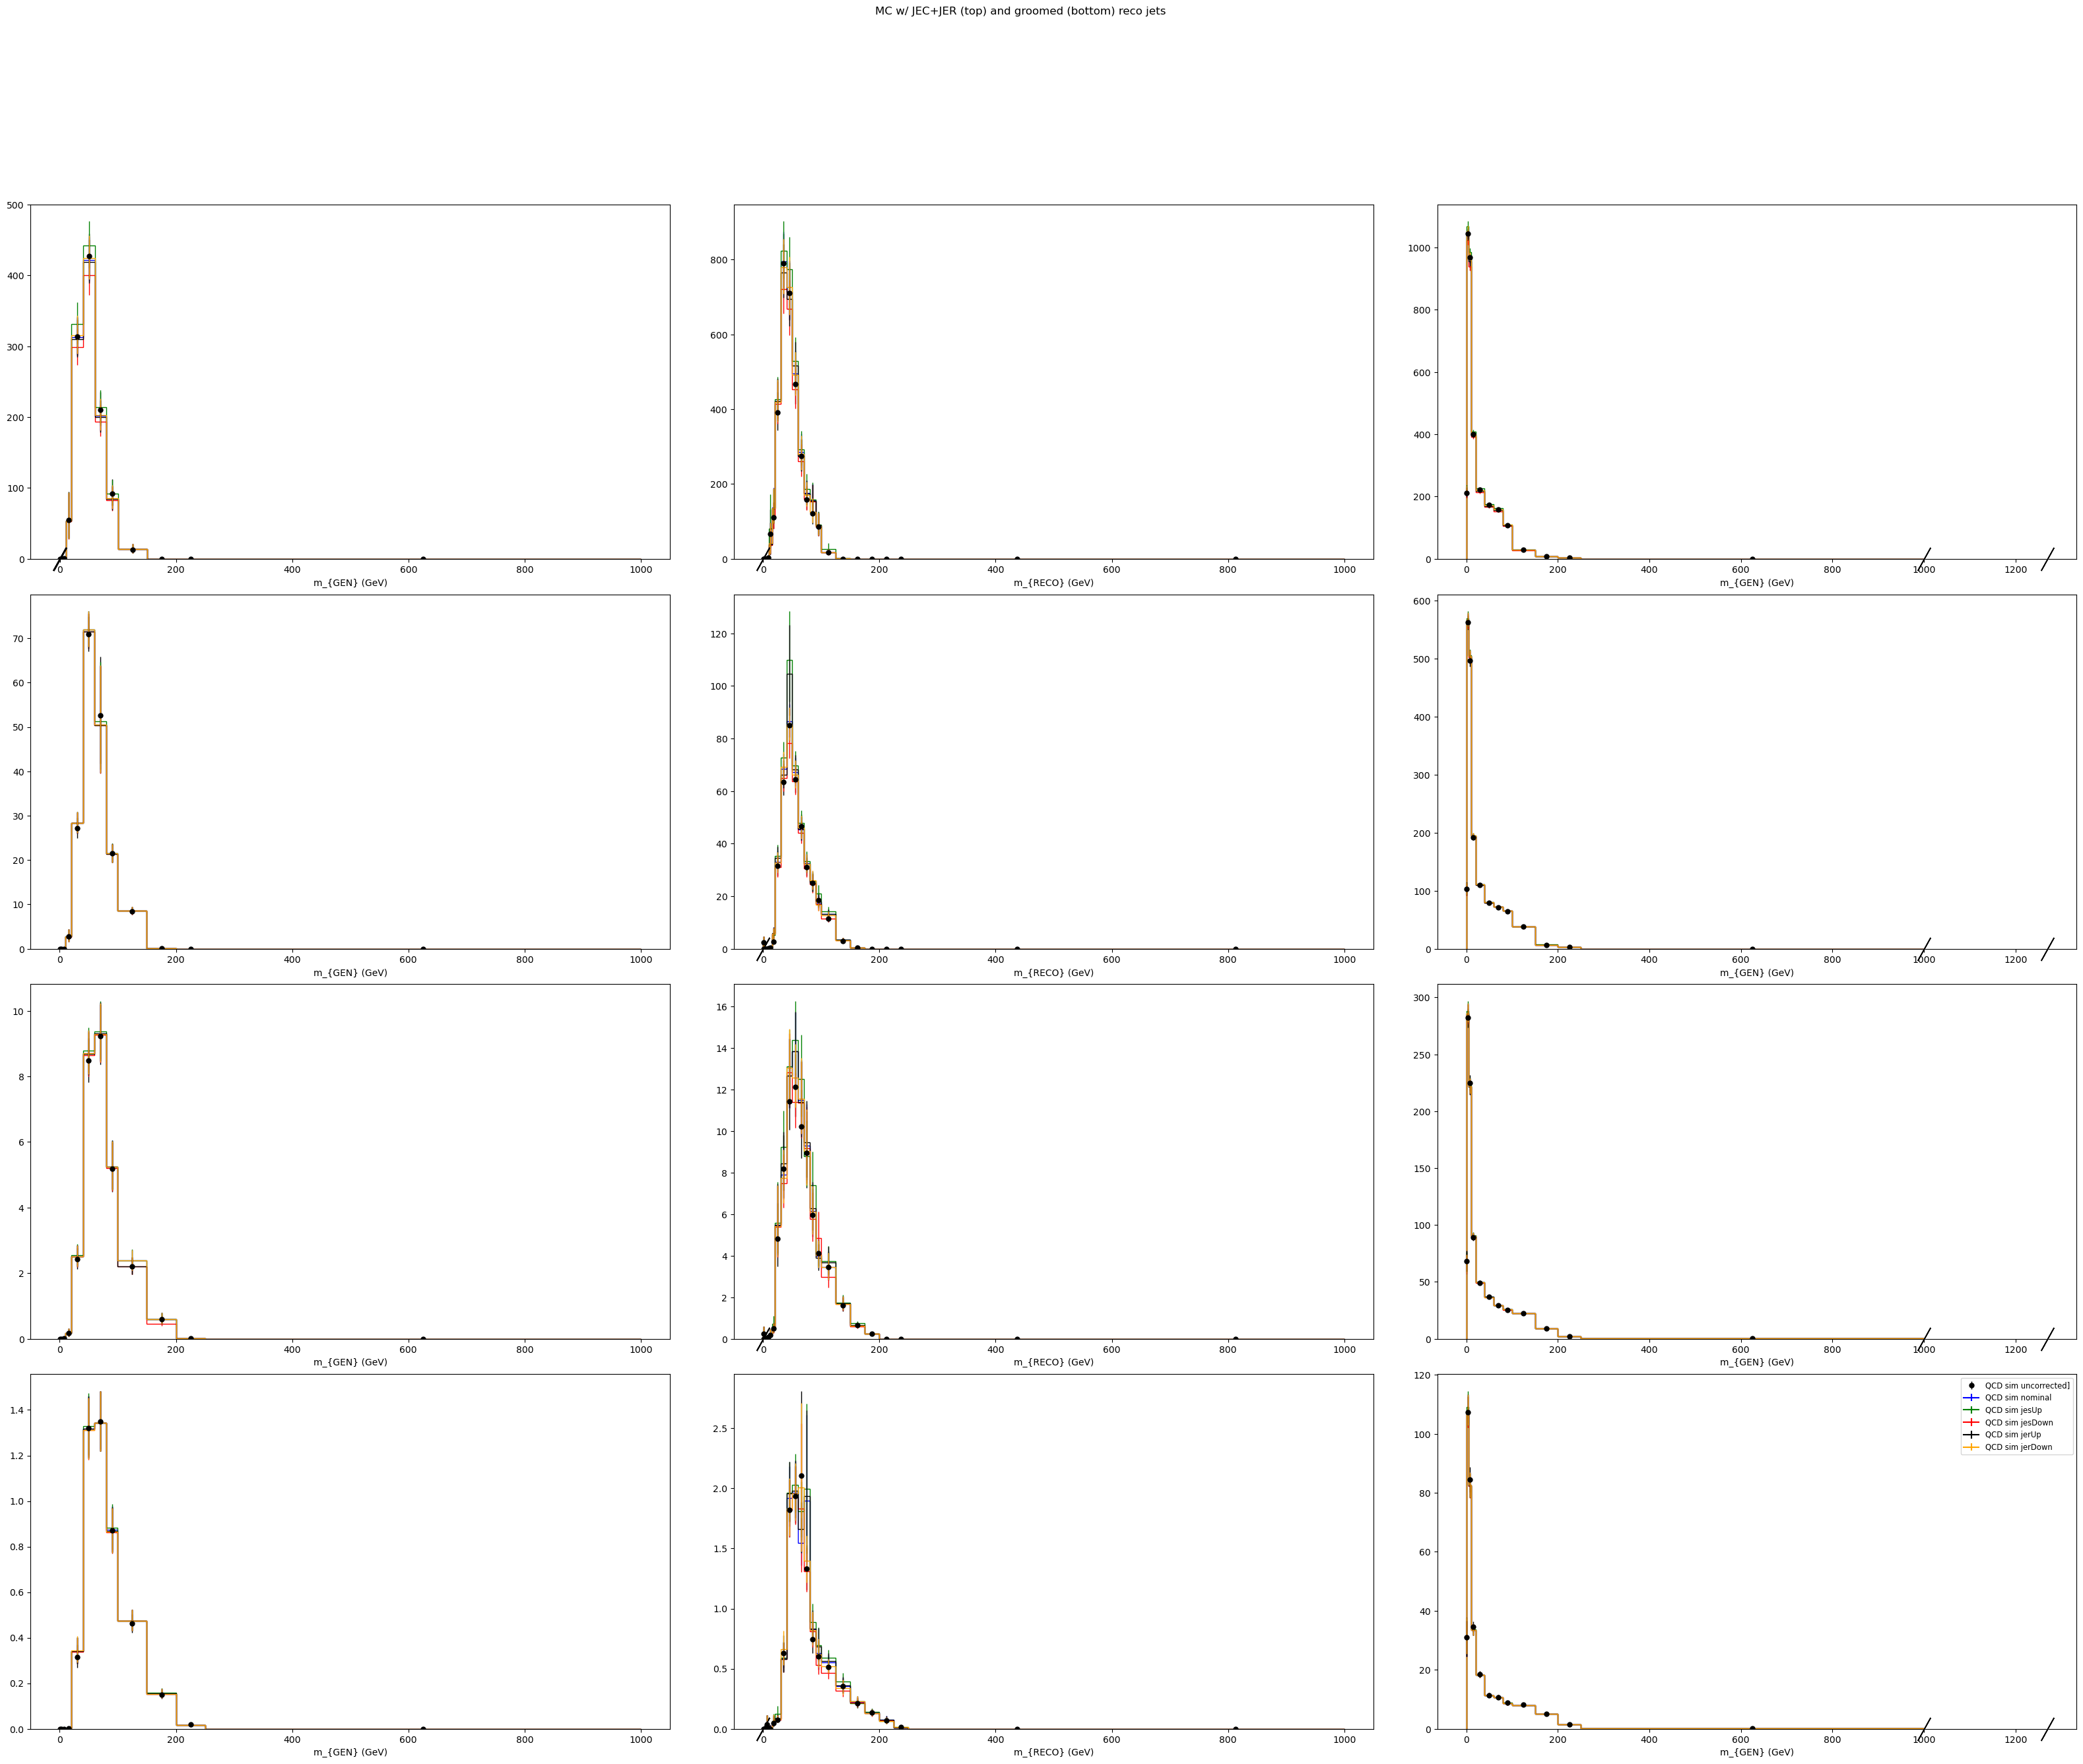

In [5]:
plt.rcParams["figure.figsize"] = (40,30)
print(result_jec.keys())
axis_names = [ax.name for ax in result_jec['jet_pt_mass_reco_u'].axes]
print(axis_names)
cats = [cat for cat in result_jec['jet_pt_mass_reco_u'][{'ptreco':sum, 'dataset':sum, 'mreco':sum}].axes[0]]
pt_bins = [bin for bin in result_jec['jet_pt_mass_reco_u'].project("ptreco").axes[0]]
print(pt_bins)
fig, axs = plt.subplots(4, 3)
print(len(axs[0]))
colors = ['b', 'g', 'r', 'k', 'orange']
print(cats)
fig.suptitle('MC w/ JEC+JER (top) and groomed (bottom) reco jets')
# mc = [result['jet_pt_mass_reco_u'][{'dataset':sum}].project('ptreco'), 
#       result['jet_pt_mass_reco_u'][{'dataset':sum}].project('mreco'), 
#       result['jet_pt_mass_reco_g'][{'dataset':sum}].project('ptreco'), 
#       result['jet_pt_mass_reco_g'][{'dataset':sum}].project('mreco')]
for j, ax in enumerate(axs):
    mc = [result['response_matrix_u'][{'dataset':sum, 'ptgen':j}].project('mgen'), 
      result['response_matrix_u'][{'dataset':sum, 'ptreco':j}].project('mreco'), 
      result['response_matrix_g'][{'dataset':sum, 'ptgen':j}].project('mgen'), 
      result['response_matrix_g'][{'dataset':sum, 'ptreco':j}].project('mreco')]
    for i in range(len(axs[0])):
        hep.histplot(mc[i], stack=False, histtype='errorbar', binwnorm=1,
                         ax=axs[j,i], density=False, marker =["."], color = 'black', linewidth=1,
                         label=['QCD sim uncorrected]'])
        for id, syst in enumerate(cats):
            mc_jec = [result_jec['response_matrix_u'][{'dataset':sum, 'syst':syst, 'ptgen':j}].project('mgen'), 
                      result_jec['jet_pt_mass_reco_u'][{'dataset':sum, 'syst':syst, 'ptreco':j}].project('mreco'), 
                      result_jec['response_matrix_g'][{'dataset':sum, 'syst':syst, 'ptgen':j}].project('mgen'), 
                      result_jec['jet_pt_mass_reco_g'][{'dataset':sum, 'syst':syst, 'ptreco':j}].project('mreco')]
            hep.histplot(mc_jec[i], stack=True, histtype='step', binwnorm=1,
                             ax=axs[j,i], density=False, linestyle =["-"],
                             color = colors[id], linewidth=1,
                             label=['QCD sim '+syst])
    plt.rc('legend',fontsize='small')
    plt.legend()

# axs[0,0].set_yscale('log')
# axs[1,0].set_yscale('log')
# axs[1,1].set_yscale('log')
# axs[0,1].set_yscale('log')

plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.savefig(os_path+"/wXSscaling_Pt_M_Reco_UG.png")

In [ ]:
import matplotlib.pyplot as plt
fname = "coffeaOutput/dijetHistsTestJetHT_pt200.0_rapidity2.5jesjec.pkl"
with open(fname, "rb") as f:
    result = pickle.load( f )
    fname = "coffeaOutput/dijetHistsTestJetHT_pt200.0_rapidity2.5.pkl"
with open(fname, "rb") as f:
    result_data = pickle.load( f )
os_path = 'plots/selectionStudies/trijet/'
checkdir(os_path)

In [ ]:
plt.rcParams["figure.figsize"] = (20,15)
fig, axs = plt.subplots(2, 2)
fig.suptitle('Ungroomed (top) and groomed (bottom) reco jets')
result['jet_pt_mass_reco_u'][{'dataset':sum}].project('ptreco').plot1d(ax=axs[0,0], binwnorm=True)
result['jet_pt_mass_reco_u'][{'dataset':sum}].project('mreco').plot1d(ax=axs[0,1], binwnorm=True)
result_data['jet_pt_mass_reco_u'][{'dataset':sum}].project('ptreco').plot1d(ax=axs[0,0], binwnorm=True)
result_data['jet_pt_mass_reco_u'][{'dataset':sum}].project('mreco').plot1d(ax=axs[0,1], binwnorm=True)
result['jet_pt_mass_reco_g'][{'dataset':sum}].project('ptreco').plot1d(ax=axs[1,0], binwnorm=True)
result['jet_pt_mass_reco_g'][{'dataset':sum}].project('mreco').plot1d(ax=axs[1,1], binwnorm=True)
result_data['jet_pt_mass_reco_g'][{'dataset':sum}].project('ptreco').plot1d(ax=axs[1,0], binwnorm=True)
result_data['jet_pt_mass_reco_g'][{'dataset':sum}].project('mreco').plot1d(ax=axs[1,1], binwnorm=True)
axs[0,0].set_yscale('log')
axs[1,0].set_yscale('log')
axs[1,1].set_yscale('log')
axs[0,1].set_yscale('log')
plt.savefig(os_path+"/pt_m_gen_ug.png")

In [ ]:
import matplotlib.pyplot as plt
fname = "coffeaOutput/trijetHists_wXSscaling_QCDsim_pt200.0_eta2.4_bbloose.pkl"
with open(fname, "rb") as f:
    result = pickle.load( f )
    fname = "coffeaOutput/trijetHists_JetHT_pt200.0_eta2.5_bbloose.pkl"
with open(fname, "rb") as f:
    result_data = pickle.load( f )
os_path = 'plots/selectionStudies/trijet/'
checkdir(os_path)